# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, data about movies collected from The Movie Database (TMDb) will be analyzed. In particular, we will try to find which year has the highest profit and which century "20 vs 21" has the highest movies rating.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# dataset loading
df = pd.read_csv('tmdb-movies.csv')

#print the first three rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#print the last three rows of the dataset
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#The number of rows and columns in the dataset
df.shape

(10866, 21)

In [5]:
# Print statistics about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Print a brief summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#Check the number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#Check the number of zeros in each column
df.astype(bool).sum(axis=0)

id                      10866
imdb_id                 10866
popularity              10866
budget                   5170
revenue                  4850
original_title          10866
cast                    10866
homepage                10866
director                10866
tagline                 10866
keywords                10866
overview                10866
runtime                 10835
genres                  10866
production_companies    10866
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj               5170
revenue_adj              4850
dtype: int64



### Data Cleaning

#### 1. Drop Unuseful Columns

In [9]:
# The columns that are not related to the analysis questions will be dropped to make the dataframe more orgnized
df.drop(['imdb_id','popularity','homepage', 'cast','tagline','director','runtime','genres','keywords','overview',
         'production_companies','budget','revenue','release_date'],inplace=True,axis=1)


#### 2. Dealing with Zero Values

In [10]:
#### Replace zero values in the budget_adj column with the mean of the same column
df['budget_adj'].replace(to_replace=0, value = df['budget_adj'].mean(), inplace=True)

In [11]:
#### Replace zero values in the revenue_adj column with the mean of the same column
df['revenue_adj'].replace(to_replace=0, value = df['revenue_adj'].mean(), inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### Which year is the most profitable?

In [12]:
# Create a new column for the profit
# The revenue_adj and budget_adj has been used because i want all years the prices to be in 2010 form.

df['profit']=df['revenue_adj']-df['budget_adj']


In [13]:
# Check the existence of the profit column
df.head()

,id,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,Star Wars: The Force Awakens,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,Furious 7,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [16]:
# group the dataset by the release year for plotting
gr=df.groupby('release_year')

Text(0, 0.5, 'Average Profit')

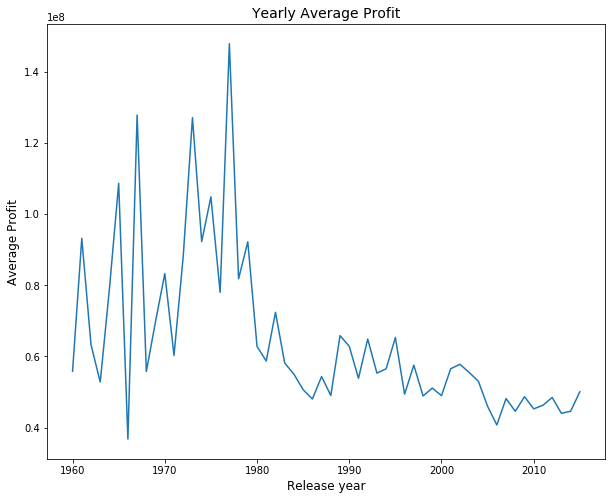

In [17]:
# plot the profit mean for each year
gr['profit'].mean().plot(figsize=(10,8))
plt.title("Yearly Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Average Profit',fontsize = 12)

#### According to the plot, the most profitable year lies between 1970-1980, and more specifically in the late 70s

### Which century "20 VS 21" has higher movies rating?

In [18]:
# Create a new dataframes for each century
twenty_century=df[df['release_year']<2001]
twentyone_century=df[df['release_year']>=2001]

Text(0, 0.5, 'Number of Movies')

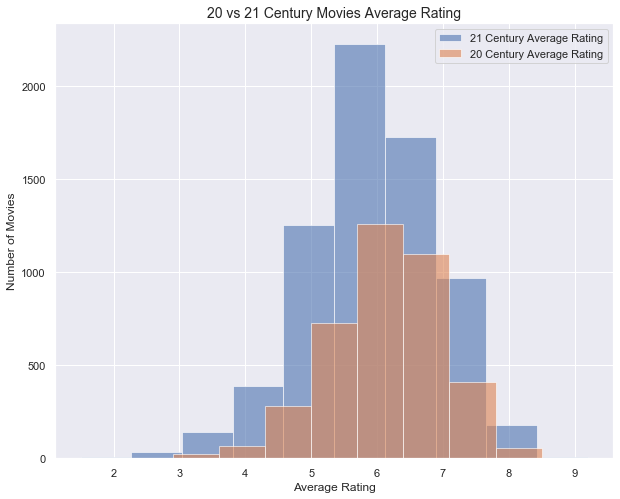

In [19]:
# Plot the average votes for each century using a histogram
sns.set()
twentyone_century['vote_average'].hist(figsize=(10,8),alpha=0.6, label='21 Century Average Rating')
twenty_century['vote_average'].hist(figsize=(10,8),alpha=0.6, label='20 Century Average Rating')


plt.legend()
plt.title("20 vs 21 Century Movies Average Rating",fontsize = 14)
plt.xlabel('Average Rating',fontsize = 12)
plt.ylabel('Number of Movies',fontsize = 12)

#### According to the plot, the twenty-one century movies has the highest rating average

<a id='conclusions'></a>
## Conclusions

After the analysis, it can be concluded that the most profitable year lies between 1970 and 1980, and more specifically it lies in the late 70s. Also, the twenty-one century has higher movies rating than the twenty century. 

There might be some limitations in the dataset because it contains many zeros, and replacing zeros with the mean value may affect the analysis result. Besides, the comparison between the twenty century and the twenty-one century might not be 100% accurate due to the difference in the number of movies in each century.